In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

In [11]:
df = pd.read_csv('dataset_ALL_10.csv')


In [12]:
X = df.drop('GESTURE', axis=1)  # Specify the target column name
y = df['GESTURE']



In [13]:
# NAIVE BAYES
# Define the number of folds for cross-validation
num_folds = 10

# Initialize lists to store accuracy values for each fold
fold_accs = []

# Create a KFold object for cross-validation
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# # Iterate over the folds
# for fold, (train_indices, test_indices) in enumerate(kfold.split(X)):
#     print(f"Fold {fold + 1}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
fold_accs.append(accuracy)

# Print the mean and standard deviation of the accuracies
# mean_accuracy = np.mean(fold_accs)
# std_accuracy = np.std(fold_accs)
# print(f"\nMean Accuracy: {mean_accuracy:.4f}")
# print(f"Standard Deviation: {std_accuracy:.4f}")

Accuracy: 0.9453860640301318


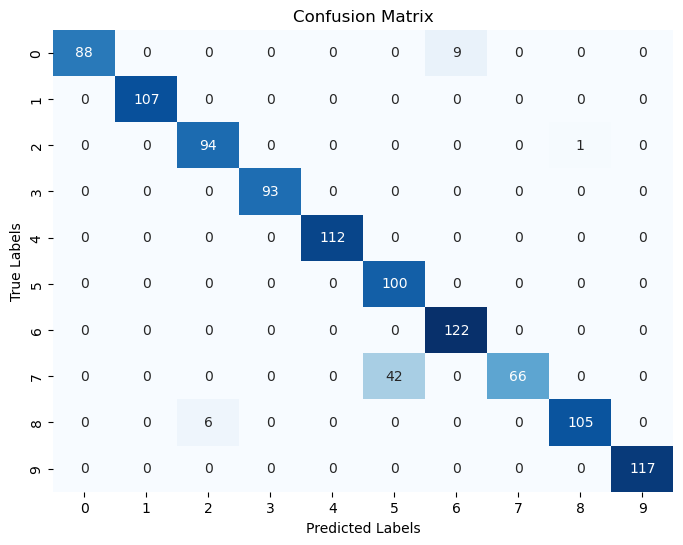

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [15]:
import joblib
joblib.dump(model, 'NB.pkl'); # saving the model